In [2]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
'''
1. Launch the website: https://www.solrenview.com/SolrenView/mainFr.php?siteId=6073
2. Trigger the event by clicking "Export Data"
3. Developer tools -> Network -> Fetch/XHR
'''
#request_URL = 'https://www.solrenview.com/srvp/FSC/SRV/getAnalyticsInfo.php?siteId=6073&queryNo=4&startIntervalTs=2025-10-22%2004:00:00&endIntervalTs=2025-10-22%2005:00:00&endDuration=2025-10-23%2000:00:00&dataInterval=3600&deviceindices=0^35346^Inverter%201%20%20[1013821839182%20PVI%2060TL]^3;0^35347^Inverter%202%20%20[1013821839191%20PVI%2060TL]^3&parList=ecount&deviceType=0^35346^Inverter%201%20[1013821839182%20PVI%2060TL]^3;0^35347^Inverter%202%20[1013821839191%20PVI%2060TL]^3&hasRg=0&maxLimit=360000&gauge=0+&dataIntervalStr=Minute'
request_URL = 'https://www.solrenview.com/srvp/FSC/SRV/getAnalyticsInfo.php?siteId=6073&queryNo=4&startIntervalTs=2025-10-24%2004:00:00&endIntervalTs=2025-10-24%2004:05:00&endDuration=2025-10-25%2000:00:00&dataInterval=300&deviceindices=0^35346^Inverter%201%20%20[1013821839182%20PVI%2060TL]^3;0^35347^Inverter%202%20%20[1013821839191%20PVI%2060TL]^3&parList=vdc;vdc2;vdc3;vdc4;idc;idc2;idc3;idc4&deviceType=0^35346^Inverter%201%20[1013821839182%20PVI%2060TL]^3;0^35347^Inverter%202%20[1013821839191%20PVI%2060TL]^3&hasRg=0&maxLimit=360000&gauge=0+&dataIntervalStr=Minute'

In [4]:
start_date = '2025-10-25'
end_date = '2025-10-26'
data_interval = 300

url = 'https://www.solrenview.com/srvp/FSC/SRV/getAnalyticsInfo.php'
params12 = {
 'siteId': '6073',
 'queryNo': '4',
 'startIntervalTs': f'{start_date} 04:00:00',
 'endIntervalTs': f'{start_date} 04:05:00', # change end date-time according to desired data interval
 'endDuration': f'{end_date} 00:00:00',
 'dataInterval': f'{data_interval}', # can be changed
 'deviceindices': '0^35346^Inverter 1  [1013821839182 PVI 60TL]^3;0^35347^Inverter 2  [1013821839191 PVI 60TL]^3',
 'parList': 'vdc;vdc2;vdc3;vdc4;idc;idc2;idc3;idc4',
 'deviceType': '0^35346^Inverter 1 [1013821839182 PVI 60TL]^3;0^35347^Inverter 2 [1013821839191 PVI 60TL]^3',
 'hasRg': '0',
 'maxLimit': '360000',
 'gauge': '0 ',
 'dataIntervalStr': 'Minute'
}

params16 = {
 'siteId': '6073',
 'queryNo': '4',
 'startIntervalTs': f'{start_date} 04:00:00',
 'endIntervalTs': f'{start_date} 04:15:00',
 'endDuration': f'{end_date} 00:00:00',
 'dataInterval': f'{data_interval}',
 'deviceindices': '0^35346^Inverter 1  [1013821839182 PVI 60TL]^3;0^35351^Inverter 6  [1013821824186 PVI 60TL]^3',
 'parList': 'vdc;vdc2;vdc3;vdc4;idc;idc2;idc3;idc4',
 'deviceType': '0^35346^Inverter 1 [1013821839182 PVI 60TL]^3;0^35351^Inverter 6 [1013821824186 PVI 60TL]^3',
 'hasRg': '0',
 'maxLimit': '360000',
 'gauge': '0 ',
 'dataIntervalStr': 'Minute'
}

In [5]:
'''
Developer tools -> Network -> Fetch/XHR -> Headers -> Request Headers
'''

# Global variables
headers = {
 'Cookie': 'siteId=6073; PHPSESSID=0ooqna8h758bs6c4jl9gl6reu7; _ga=GA1.2.792316693.1761186174; _gid=GA1.2.2038752395.1761186174; _gat=1; _ga_L4S8LG26JM=GS2.2.s1761186174$o1$g1$t1761186879$j60$l0$h0',
 'Referer': 'https://www.solrenview.com/srvp/FSC/SRV/analyticsT.php?siteId=6073&CurrentTab=3',
 'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Mobile Safari/537.36'
}

url = 'https://www.solrenview.com/srvp/FSC/SRV/getAnalyticsInfo.php'


In [6]:
def get_query_params(url):
  params = url.split('?')[1] # start of query string
  queries = params.split('&') # query string separator
  
  params = {}
  for item in queries:
    name, val = item.split("=")
    params[name] = val
  return params

def construct_params(start_date, end_date):
  params12 = {
    'siteId': '6073',
    'queryNo': '4',
    'startIntervalTs': f'{start_date} 04:00:00',
    'endIntervalTs': f'{start_date} 04:05:00', # change end date-time according to desired data interval
    'endDuration': f'{end_date} 00:00:00',
    'dataInterval': 300, # can be changed
    'deviceindices': '0^35346^Inverter 1  [1013821839182 PVI 60TL]^3;0^35347^Inverter 2  [1013821839191 PVI 60TL]^3',
    'parList': 'vdc;vdc2;vdc3;vdc4;idc;idc2;idc3;idc4',
    'deviceType': '0^35346^Inverter 1 [1013821839182 PVI 60TL]^3;0^35347^Inverter 2 [1013821839191 PVI 60TL]^3',
    'hasRg': '0',
    'maxLimit': '360000',
    'gauge': '0 ',
    'dataIntervalStr': 'Minute'
  }

  params16 = {
    'siteId': '6073',
    'queryNo': '4',
    'startIntervalTs': f'{start_date} 04:00:00',
    'endIntervalTs': f'{start_date} 04:05:00',
    'endDuration': f'{end_date} 00:00:00',
    'dataInterval': 300,
    'deviceindices': '0^35346^Inverter 1  [1013821839182 PVI 60TL]^3;0^35351^Inverter 6  [1013821824186 PVI 60TL]^3',
    'parList': 'vdc;vdc2;vdc3;vdc4;idc;idc2;idc3;idc4',
    'deviceType': '0^35346^Inverter 1 [1013821839182 PVI 60TL]^3;0^35351^Inverter 6 [1013821824186 PVI 60TL]^3',
    'hasRg': '0',
    'maxLimit': '360000',
    'gauge': '0 ',
    'dataIntervalStr': 'Minute'
    }
  
  return (params12, params16)

def get_request(start_date, end_date):
  params12, params16 = construct_params(start_date, end_date)
  response12 = requests.get(url, params=params12, headers=headers)
  response16 = requests.get(url, params=params16, headers=headers)
  response_arr = [response12, response16]

In [10]:
params12, params16 = construct_params('2025-10-25', '2025-10-26')

In [11]:
response12 = requests.get(url, params=params12, headers=headers)
response16 = requests.get(url, params=params16, headers=headers)
response_arr = [response12, response16]

In [12]:
response = response_arr[0]
cat = response.json()['categories']

time_labels = cat[0]['category']
timestamp = []
for label in time_labels:
  str = start_date + ' ' + label['label']
  #timestamp.append(pd.to_datetime(str))
  timestamp.append(str.upper())

timestamp = pd.to_datetime(timestamp)

In [13]:
inv1_iv_data_arr = response_arr[0].json()['dataset'][0:6]
inv2_iv_data_arr = response_arr[0].json()['dataset'][6:]
inv6_iv_data_arr = response_arr[1].json()['dataset'][6:]

all_inv_data_arr = [inv1_iv_data_arr, inv2_iv_data_arr, inv6_iv_data_arr]

In [14]:
all_volt_data = []
all_curr_data = []
all_timestamp = []

for i_inv, inv_data_arr in enumerate(all_inv_data_arr):
  for i, data_dict in enumerate(inv_data_arr):
    if i < 3:
      arr = [float(dict['value']) if dict['value'] != '' else 0 for dict in data_dict['data']]
      all_volt_data.extend(arr)
      all_timestamp.extend(timestamp)
    else:
      arr = [float(dict['value']) if dict['value'] != '' else 0 for dict in data_dict['data']]
      all_curr_data.extend(arr)

In [15]:
all_equipment = []
for i_inv in range(len(all_inv_data_arr)):
  for i, data_dict in enumerate(inv_data_arr[0:3]):
    equipment_code = f'inv{i_inv + 1}_str{(i % 3) + 1}'
    all_equipment.extend([equipment_code] * len(data_dict['data']))

In [16]:
data = {'timestamp': all_timestamp, 'equipment_code': all_equipment, 'current': all_curr_data, 'voltage': all_volt_data}

In [17]:
df = pd.DataFrame(data=data)

In [ ]:
# df = df.set_index('timestamp')
# curr = df['current'].resample('15min').mean()
# volt = df['voltage'].resample('15min').mean()
# equipment_code = df['equipment_code'].resample('15min').first()

In [18]:
df

,timestamp,equipment_code,current,voltage
0,2025-10-25 04:00:00,inv1_str1,0.0,0.0
1,2025-10-25 04:05:00,inv1_str1,0.0,0.0
2,2025-10-25 04:10:00,inv1_str1,0.0,0.0
3,2025-10-25 04:15:00,inv1_str1,0.0,0.0
4,2025-10-25 04:20:00,inv1_str1,0.0,0.0
...,...,...,...,...
2155,2025-10-25 23:35:00,inv3_str3,0.0,0.0
2156,2025-10-25 23:40:00,inv3_str3,0.0,0.0
2157,2025-10-25 23:45:00,inv3_str3,0.0,0.0
2158,2025-10-25 23:50:00,inv3_str3,0.0,0.0


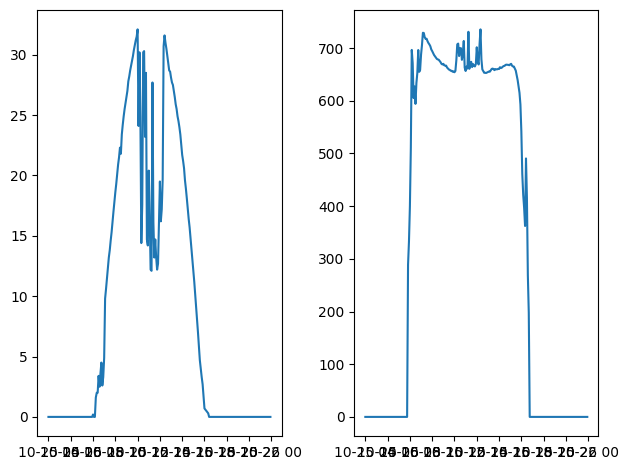

In [22]:
subdf = df[df["equipment_code"] == 'inv1_str1']
plt.subplot(121)
plt.plot(subdf['timestamp'], subdf['current'])
plt.subplot(122)
plt.plot(subdf['timestamp'], subdf['voltage'])
plt.tight_layout()